In [60]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pandas import DataFrame
import seaborn as sns

### 1.Load Data : State level Files

In [92]:
Mobility_ByState = pd.read_csv('C:/Users/ysman/Documents/springboard/1 Google Mobility and Covid/python df exports/mobiliy_Statelevel.csv', sep=',')
Population_ByState = pd.read_csv('C:/Users/ysman/Documents/springboard/1 Google Mobility and Covid/python df exports/us_population_Statelevel.csv', sep=',')
Covid_ByState = pd.read_csv('C:/Users/ysman/Documents/springboard/1 Google Mobility and Covid/python df exports/Covid_Statelevel.csv', sep=',')

In [93]:
Mobility_ByState.head()

,Unnamed: 0,state,Date,recreation,grocery,parks,transit,workspace,residential,Mask-Never,Mask-Rarely,Mask-Sometimes,Mask-Frequently,Mask-Always
0,0,Alabama,2020-02-15,6.0,1.0,55.0,5.0,2.0,-1.0,0.0775,0.0735,0.1355,0.2005,0.4675
1,1,Alabama,2020-02-16,-0.5,-3.0,-2.5,4.0,-2.0,0.0,0.0780,0.0730,0.1350,0.2010,0.4690
2,2,Alabama,2020-02-17,1.0,-3.0,10.0,8.0,-15.0,4.0,0.0770,0.0740,0.1360,0.2010,0.4660
3,3,Alabama,2020-02-18,-4.0,-6.0,-13.5,0.0,1.0,2.0,0.0770,0.0740,0.1360,0.2010,0.4660
4,4,Alabama,2020-02-19,2.0,0.0,3.0,5.0,2.0,0.0,0.0770,0.0740,0.1360,0.2010,0.4660


In [63]:
Population_ByState.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Unnamed: 0                                  969 non-null    int64 
 1   State                                       969 non-null    object
 2   AGEGRP                                      969 non-null    object
 3   Total Population                            969 non-null    int64 
 4   Male Pop                                    969 non-null    int64 
 5   Female Pop                                  969 non-null    int64 
 6   White -R                                    969 non-null    int64 
 7   Black - R                                   969 non-null    int64 
 8   American Indian and Alaska Native           969 non-null    int64 
 9   Asian                                       969 non-null    int64 
 10  Native Hawaiian and Other 

In [64]:
Covid_ByState.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15370 entries, 0 to 15369
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       15370 non-null  int64  
 1   State            15370 non-null  object 
 2   Date             15370 non-null  object 
 3   Confirmed        15370 non-null  int64  
 4   Dead             15370 non-null  int64  
 5   allbed_mean      11016 non-null  float64
 6   Population       13780 non-null  float64
 7   Total_Confirmed  15370 non-null  int64  
 8   Total_Dead       15370 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 1.1+ MB


### Merge Mobility Mask and Population Data

In [94]:
Mobility_Covid = pd.merge(Covid_ByState, Mobility_ByState, how = 'left', left_on = ['State', 'Date'] , right_on=['state', 'Date'])

In [95]:
Mobility_Covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15370 entries, 0 to 15369
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0_x     15370 non-null  int64  
 1   State            15370 non-null  object 
 2   Date             15370 non-null  object 
 3   Confirmed        15370 non-null  int64  
 4   Dead             15370 non-null  int64  
 5   allbed_mean      11016 non-null  float64
 6   Population       13780 non-null  float64
 7   Total_Confirmed  15370 non-null  int64  
 8   Total_Dead       15370 non-null  int64  
 9   Unnamed: 0_y     11118 non-null  float64
 10  state            11118 non-null  object 
 11  recreation       9384 non-null   float64
 12  grocery          9384 non-null   float64
 13  parks            9242 non-null   float64
 14  transit          9384 non-null   float64
 15  workspace        11118 non-null  float64
 16  residential      11117 non-null  float64
 17  Mask-Never  

In [67]:
Mobility_Covid.drop(['Unnamed: 0_x'], axis=1)
Mobility_Covid.drop(['Unnamed: 0_y'], axis=1)
Mobility_Covid.drop(['state'], axis=1)
Mobility_Covid.rename(columns={'allbed_mean':'HospBed_AVG'})

,Unnamed: 0_x,State,Date,Confirmed,Dead,HospBed_AVG,Population,Total_Confirmed,Total_Dead,Unnamed: 0_y,...,grocery,parks,transit,workspace,residential,Mask-Never,Mask-Rarely,Mask-Sometimes,Mask-Frequently,Mask-Always
0,0,Alabama,2020-01-22,0,0,0.0,4903185.0,12736577,242163,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Alabama,2020-01-23,0,0,0.0,4903185.0,12736577,242163,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Alabama,2020-01-24,0,0,0.0,4903185.0,12736577,242163,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Alabama,2020-01-25,0,0,0.0,4903185.0,12736577,242163,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Alabama,2020-01-26,0,0,0.0,4903185.0,12736577,242163,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15365,15365,Wyoming,2020-10-08,7092,54,NaN,578759.0,456267,4636,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15366,15366,Wyoming,2020-10-09,7335,54,NaN,578759.0,456267,4636,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15367,15367,Wyoming,2020-10-10,7455,54,NaN,578759.0,456267,4636,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15368,15368,Wyoming,2020-10-11,7611,54,NaN,578759.0,456267,4636,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
Mobility_Covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15370 entries, 0 to 15369
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0_x     15370 non-null  int64  
 1   State            15370 non-null  object 
 2   Date             15370 non-null  object 
 3   Confirmed        15370 non-null  int64  
 4   Dead             15370 non-null  int64  
 5   allbed_mean      11016 non-null  float64
 6   Population       13780 non-null  float64
 7   Total_Confirmed  15370 non-null  int64  
 8   Total_Dead       15370 non-null  int64  
 9   Unnamed: 0_y     11118 non-null  float64
 10  state            11118 non-null  object 
 11  recreation       9384 non-null   float64
 12  grocery          9384 non-null   float64
 13  parks            9242 non-null   float64
 14  transit          9384 non-null   float64
 15  workspace        11118 non-null  float64
 16  residential      11117 non-null  float64
 17  Mask-Never  

In [96]:
Mobility_Covid.to_csv('C:/Users/ysman/Documents/springboard/1 Google Mobility and Covid/python df exports/mobiliy_Covid_StateLevel.csv', sep=',', index=True)

In [97]:
#reload file after excel cleanup

Mobility_Covid= pd.read_csv('C:/Users/ysman/Documents/springboard/1 Google Mobility and Covid/python df exports/mobiliy_Covid_StateLevel.csv', sep=',')
Mobility_Covid.head()

,State,Date,Confirmed,Dead,allbed_mean,Population,Total_Confirmed,Total_Dead,recreation,grocery,parks,transit,workspace,residential,Mask-Never,Mask-Rarely,Mask-Sometimes,Mask-Frequently,Mask-Always
0,Alabama,1/22/2020,0,0,0.0,4903185.0,12736577,242163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,1/23/2020,0,0,0.0,4903185.0,12736577,242163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,1/24/2020,0,0,0.0,4903185.0,12736577,242163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,1/25/2020,0,0,0.0,4903185.0,12736577,242163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,1/26/2020,0,0,0.0,4903185.0,12736577,242163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
Mobility_Covid = Mobility_Covid[Mobility_Covid['State'] != 'American Samoa']

In [99]:
Mobility_Covid.set_index(['Date'])

,State,Confirmed,Dead,allbed_mean,Population,Total_Confirmed,Total_Dead,recreation,grocery,parks,transit,workspace,residential,Mask-Never,Mask-Rarely,Mask-Sometimes,Mask-Frequently,Mask-Always
Date,,,,,,,,,,,,,,,,,,
1/22/2020,Alabama,0,0,0.0,4903185.0,12736577,242163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/2020,Alabama,0,0,0.0,4903185.0,12736577,242163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/24/2020,Alabama,0,0,0.0,4903185.0,12736577,242163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/25/2020,Alabama,0,0,0.0,4903185.0,12736577,242163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/26/2020,Alabama,0,0,0.0,4903185.0,12736577,242163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/8/2020,Wyoming,7092,54,NaN,578759.0,456267,4636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/9/2020,Wyoming,7335,54,NaN,578759.0,456267,4636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/10/2020,Wyoming,7455,54,NaN,578759.0,456267,4636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
Mobility_Covid_corr= pd.read_csv('C:/Users/ysman/Documents/springboard/1 Google Mobility and Covid/python df exports/mobiliy_Covid_corr.csv', sep=',')
Mobility_Covid_corr

,State,Date,Confirmed,Dead,allbed_mean,Population,Total_Confirmed,Total_Dead,recreation,grocery,parks,transit,workspace,residential,Mask-Never,Mask-Rarely,Mask-Sometimes,Mask-Frequently,Mask-Always
0,Alabama,2/15/2020,0,0,0.0,4903185.0,12736577,242163,6.0,1.0,55.0,5.0,2.0,-1.0,0.0775,0.0735,0.1355,0.2005,0.4675
1,Alabama,2/16/2020,0,0,0.0,4903185.0,12736577,242163,-0.5,-3.0,-2.5,4.0,-2.0,0.0,0.0780,0.0730,0.1350,0.2010,0.4690
2,Alabama,2/17/2020,0,0,0.0,4903185.0,12736577,242163,1.0,-3.0,10.0,8.0,-15.0,4.0,0.0770,0.0740,0.1360,0.2010,0.4660
3,Alabama,2/18/2020,0,0,0.0,4903185.0,12736577,242163,-4.0,-6.0,-13.5,0.0,1.0,2.0,0.0770,0.0740,0.1360,0.2010,0.4660
4,Alabama,2/19/2020,0,0,0.0,4903185.0,12736577,242163,2.0,0.0,3.0,5.0,2.0,0.0,0.0770,0.0740,0.1360,0.2010,0.4660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,Wyoming,8/12/2020,3086,29,0.0,578759.0,456267,4636,10.5,16.0,92.0,36.0,-24.5,3.5,0.1460,0.1540,0.1205,0.2220,0.3295
10668,Wyoming,8/13/2020,3119,30,0.0,578759.0,456267,4636,13.5,20.0,96.0,44.0,-25.0,3.5,0.1450,0.1530,0.1210,0.2210,0.3350
10669,Wyoming,8/14/2020,3183,30,0.0,578759.0,456267,4636,10.0,16.0,109.0,59.0,-25.5,3.0,0.1460,0.1540,0.1205,0.2220,0.3295
10670,Wyoming,8/15/2020,3227,30,0.0,578759.0,456267,4636,3.5,12.5,NaN,67.0,-10.0,-2.0,0.1370,0.1550,0.1245,0.2220,0.3295


# Correlation

In [101]:
corr = Mobility_Covid.corr()
corr.style.background_gradient(cmap='Reds')

,Confirmed,Dead,allbed_mean,Population,Total_Confirmed,Total_Dead,recreation,grocery,parks,transit,workspace,residential,Mask-Never,Mask-Rarely,Mask-Sometimes,Mask-Frequently,Mask-Always
Confirmed,1.000000,0.773843,0.231886,0.571886,0.626077,0.490204,-0.038690,-0.028252,0.111927,-0.055641,-0.088142,-0.032945,-0.202219,-0.213590,-0.182871,-0.181113,0.207528
Dead,0.773843,1.000000,0.315051,0.442183,0.603047,0.770198,-0.066981,-0.003283,0.189118,-0.107699,-0.112550,0.018711,-0.264376,-0.283447,-0.291111,-0.294038,0.306107
allbed_mean,0.231886,0.315051,1.000000,0.292646,0.372667,0.473067,-0.322604,-0.204628,-0.075389,-0.284464,-0.268978,0.312042,-0.211671,-0.220413,-0.214655,-0.206373,0.230844
Population,0.571886,0.442183,0.292646,1.000000,0.927794,0.577192,-0.097402,-0.064256,-0.106328,-0.066667,-0.021644,0.045295,-0.281909,-0.286774,-0.198943,-0.164841,0.251948
Total_Confirmed,0.626077,0.603047,0.372667,0.927794,1.000000,0.782977,-0.119755,-0.082814,-0.119247,-0.106340,-0.038275,0.063143,-0.293838,-0.310165,-0.252110,-0.251122,0.295071
Total_Dead,0.490204,0.770198,0.473067,0.577192,0.782977,1.000000,-0.139424,-0.071915,0.021870,-0.167989,-0.077447,0.086107,-0.332751,-0.356408,-0.361024,-0.365065,0.382691
recreation,-0.038690,-0.066981,-0.322604,-0.097402,-0.119755,-0.139424,1.000000,0.790275,0.424522,0.797609,0.668666,-0.790573,0.264606,0.266106,0.271300,0.257116,-0.294044
grocery,-0.028252,-0.003283,-0.204628,-0.064256,-0.082814,-0.071915,0.790275,1.000000,0.495452,0.732875,0.503536,-0.605236,0.319598,0.339459,0.352287,0.327160,-0.372623
parks,0.111927,0.189118,-0.075389,-0.106328,-0.119247,0.021870,0.424522,0.495452,1.000000,0.383591,0.133178,-0.327892,0.082027,0.123961,0.126415,0.115524,-0.131921
transit,-0.055641,-0.107699,-0.284464,-0.066667,-0.106340,-0.167989,0.797609,0.732875,0.383591,1.000000,0.642390,-0.718068,0.426217,0.431301,0.466536,0.433726,-0.476662


In [102]:
corr

,Confirmed,Dead,allbed_mean,Population,Total_Confirmed,Total_Dead,recreation,grocery,parks,transit,workspace,residential,Mask-Never,Mask-Rarely,Mask-Sometimes,Mask-Frequently,Mask-Always
Confirmed,1.000000,0.773843,0.231886,0.571886,0.626077,0.490204,-0.038690,-0.028252,0.111927,-0.055641,-0.088142,-0.032945,-0.202219,-0.213590,-0.182871,-0.181113,0.207528
Dead,0.773843,1.000000,0.315051,0.442183,0.603047,0.770198,-0.066981,-0.003283,0.189118,-0.107699,-0.112550,0.018711,-0.264376,-0.283447,-0.291111,-0.294038,0.306107
allbed_mean,0.231886,0.315051,1.000000,0.292646,0.372667,0.473067,-0.322604,-0.204628,-0.075389,-0.284464,-0.268978,0.312042,-0.211671,-0.220413,-0.214655,-0.206373,0.230844
Population,0.571886,0.442183,0.292646,1.000000,0.927794,0.577192,-0.097402,-0.064256,-0.106328,-0.066667,-0.021644,0.045295,-0.281909,-0.286774,-0.198943,-0.164841,0.251948
Total_Confirmed,0.626077,0.603047,0.372667,0.927794,1.000000,0.782977,-0.119755,-0.082814,-0.119247,-0.106340,-0.038275,0.063143,-0.293838,-0.310165,-0.252110,-0.251122,0.295071
Total_Dead,0.490204,0.770198,0.473067,0.577192,0.782977,1.000000,-0.139424,-0.071915,0.021870,-0.167989,-0.077447,0.086107,-0.332751,-0.356408,-0.361024,-0.365065,0.382691
recreation,-0.038690,-0.066981,-0.322604,-0.097402,-0.119755,-0.139424,1.000000,0.790275,0.424522,0.797609,0.668666,-0.790573,0.264606,0.266106,0.271300,0.257116,-0.294044
grocery,-0.028252,-0.003283,-0.204628,-0.064256,-0.082814,-0.071915,0.790275,1.000000,0.495452,0.732875,0.503536,-0.605236,0.319598,0.339459,0.352287,0.327160,-0.372623
parks,0.111927,0.189118,-0.075389,-0.106328,-0.119247,0.021870,0.424522,0.495452,1.000000,0.383591,0.133178,-0.327892,0.082027,0.123961,0.126415,0.115524,-0.131921
transit,-0.055641,-0.107699,-0.284464,-0.066667,-0.106340,-0.167989,0.797609,0.732875,0.383591,1.000000,0.642390,-0.718068,0.426217,0.431301,0.466536,0.433726,-0.476662


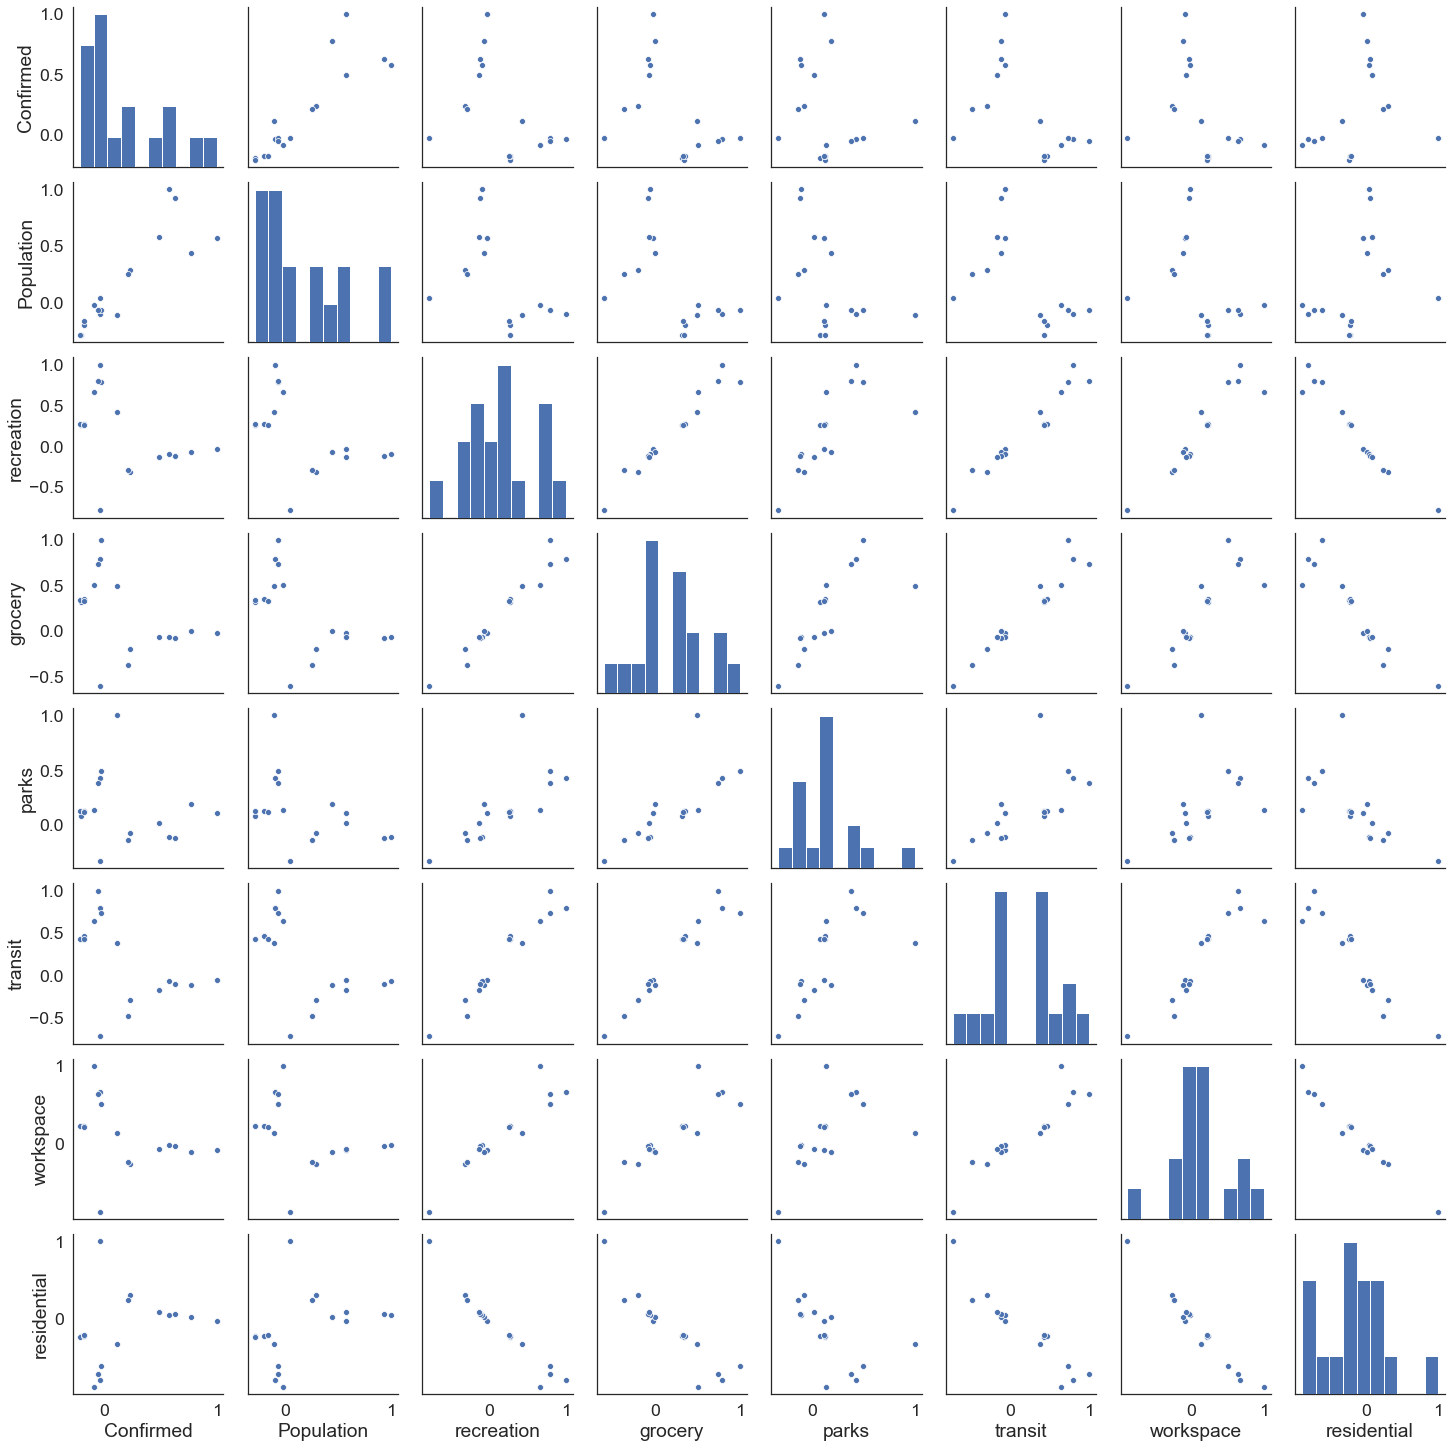

In [103]:
%matplotlib inline

sns.pairplot(corr, vars=['Confirmed', 'Population','recreation','grocery','parks','transit','workspace','residential'], dropna=True)

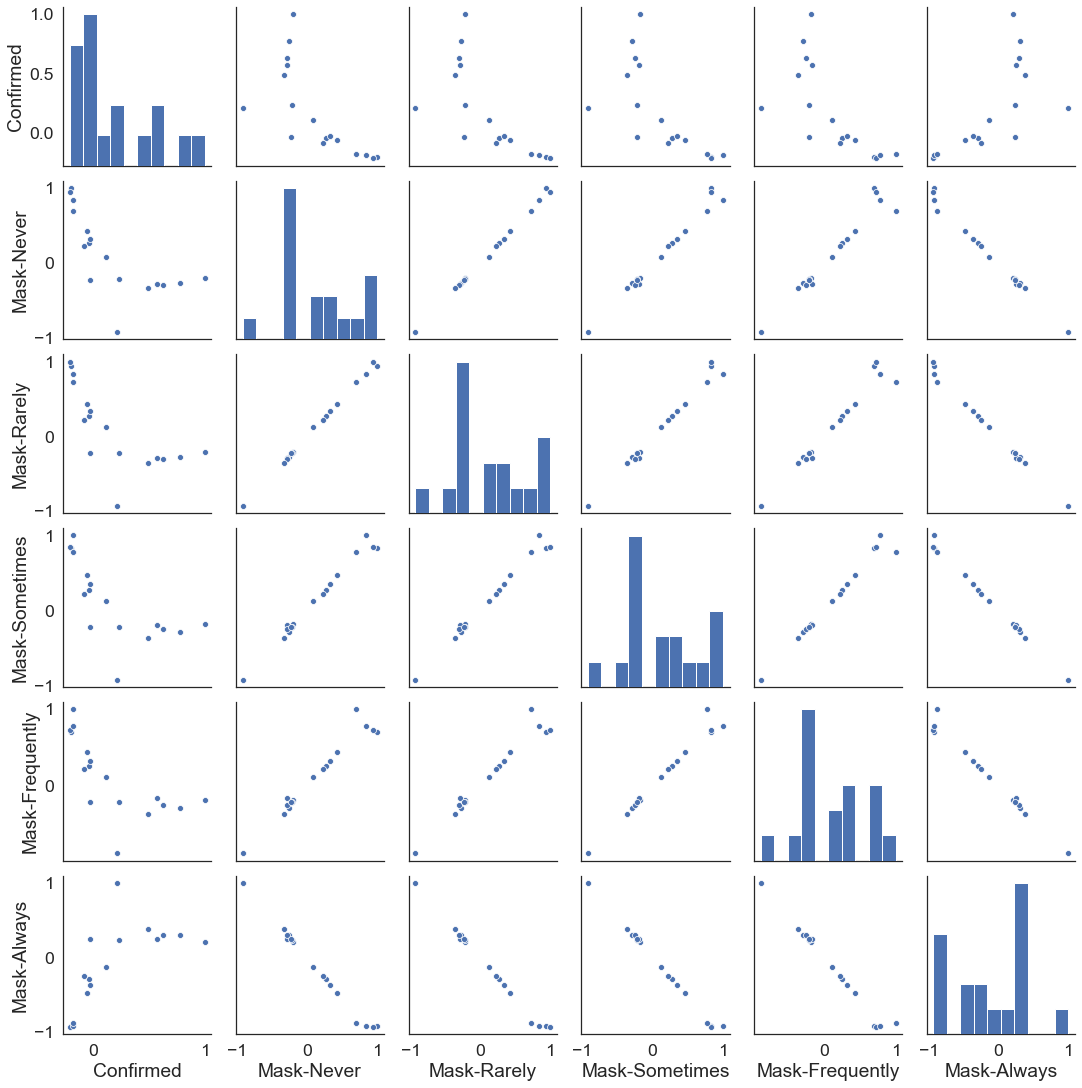

In [104]:
sns.pairplot(corr, vars=['Confirmed','Mask-Never','Mask-Rarely','Mask-Sometimes','Mask-Frequently','Mask-Always'] , dropna=True)